In [1]:
import networkx as nx
#import nxviz as nv
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection

In [2]:
def show_graph(G,draw=False):
    print('nodes:', len(G), 'edges:', len(G.edges()),type(G))
    print('node :', list(G.nodes(data=True))[0])
    print('edge :', list(G.edges(data=True))[0])
    if draw == True:
        nx.draw(G,with_labels=True)
        plt.show

nodes: 10 edges: 45 <class 'networkx.classes.graph.Graph'>
node : (0, {})
edge : (0, 1, {})


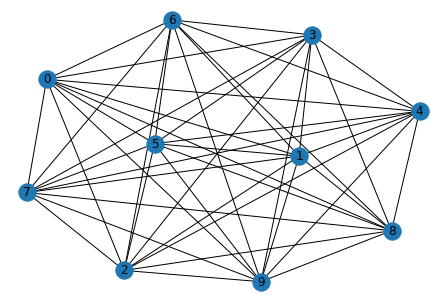

In [3]:
comp_G =nx.complete_graph(10)
show_graph(comp_G,draw=True)

### <b>savme/load list/csv</b>

# <b>Find clicks</b>

nodes: 12 edges: 23 <class 'networkx.classes.graph.Graph'>
node : (0, {})
edge : (0, 1, {})


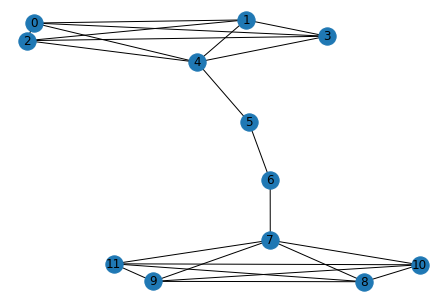

In [4]:
barb_G = nx.barbell_graph(5, 2)
show_graph(barb_G,draw=True)

## Girvan_newman algorithm

In [5]:
list(girvan_newman(barb_G))

[({0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}),
 ({0, 1, 2, 3, 4}, {5}, {6, 7, 8, 9, 10, 11}),
 ({0, 1, 2, 3, 4}, {5}, {6}, {7, 8, 9, 10, 11}),
 ({0}, {1, 2, 3, 4}, {5}, {6}, {7, 8, 9, 10, 11}),
 ({0}, {1}, {2, 3, 4}, {5}, {6}, {7, 8, 9, 10, 11}),
 ({0}, {1}, {2}, {3, 4}, {5}, {6}, {7, 8, 9, 10, 11}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7, 8, 9, 10, 11}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9, 10, 11}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9, 10, 11}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10, 11}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11})]

In [6]:
def communities_lenght_girvan_newman(G,max_communities_number):
    """
    show split to communities per level
    """
    from networkx.algorithms.community import girvan_newman
    level_number = 0
    for level in list(girvan_newman(G)):
        number_of_communities = len(tuple(sorted(c) for c in level))
        if number_of_communities <= max_communities_number:
            print('level number :',level_number,'number of communities: ', number_of_communities)
            level_number +=1
            communities_len = []
            for community in level:
                communities_len.append(len(community))
            print(communities_len)          
        else:
            break

In [7]:
communities_lenght_girvan_newman(barb_G,5)

level number : 0 number of communities:  2
[6, 6]
level number : 1 number of communities:  3
[5, 1, 6]
level number : 2 number of communities:  4
[5, 1, 1, 5]
level number : 3 number of communities:  5
[1, 4, 1, 1, 5]


In [8]:
def split_girvan_newman(G,communities_number):
    """
    Girvan_newman algorithm
    """
    from networkx.algorithms.community import girvan_newman
    communities_generator = girvan_newman(G)
    top_level_communities = next(communities_generator)
    if communities_number > 0:
        for i in range(communities_number):
            next_level_communities = next(communities_generator)
        return sorted(map(sorted, next_level_communities))
    else:
        return sorted(map(sorted, top_level_communities))

In [60]:
communities = split_girvan_newman(barb_G,2)
communities

[[0, 1, 2, 3, 4], [5], [6], [7, 8, 9, 10, 11]]

In [61]:
def communities_paint(G,communities):
    """
    Paint communities
    """
    G = nx.Graph(G) #make unfrozen graph
    colors = ['b','g','r','c','m','y','k','w']
    color_num =0
    for i in communities:
        G.add_nodes_from(i, color= colors[color_num])
        color_num +=1
    #print('communities :',communities)    
    nx.draw(G,with_labels=True, node_color=[i[1]['color'] for i in G.nodes(data=True)])
    plt.show        

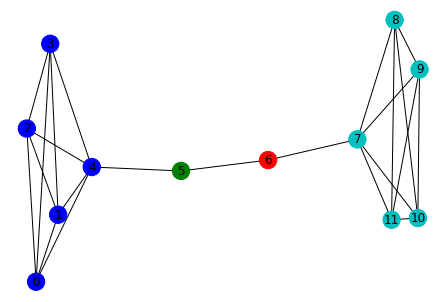

In [62]:
communities_paint(barb_G, communities)

## Kernighan–Lin bipartition algorithm

In [12]:
from networkx.algorithms.community import kernighan_lin_bisection
# Kernighan–Lin bipartition algorithm
kernighan = kernighan_lin_bisection(barb_G)
kernighan 

({0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11})

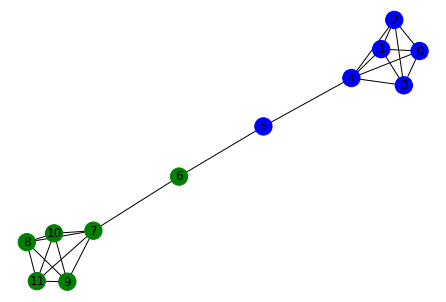

In [13]:
communities_paint(barb_G, kernighan)

## Modularity-based communities algorithm

In [14]:
#Modularity-based communities
from networkx.algorithms.community import greedy_modularity_communities
Modularity = greedy_modularity_communities(barb_G)
Modularity

[frozenset({0, 1, 2, 3, 4}), frozenset({7, 8, 9, 10, 11}), frozenset({5, 6})]

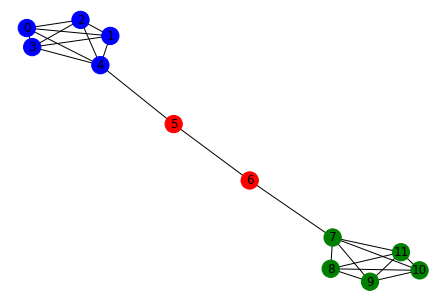

In [15]:
communities_paint(barb_G, Modularity)

## Label propagation algorithm

In [26]:
#Label propagation
from networkx.algorithms.community import label_propagation_communities
propagation = label_propagation_communities(barb_G)
list(propagation)

[{6, 7, 8, 9, 10, 11}, {0, 1, 2, 3, 4, 5}]

## K-Clique algorithm  

In [39]:
# K-Clique
from networkx.algorithms.community import k_clique_communities

In [52]:
list(k_clique_communities(barb_G,3))

[frozenset({0, 1, 2, 3, 4}), frozenset({7, 8, 9, 10, 11})]

## <b>Fluid Communities require connected Graphs</b>

In [56]:
#Fluid Communities
k=3
from networkx.algorithms.community import asyn_fluidc
Fluid = asyn_fluidc(barb_G, k, max_iter=100, seed=None)
list(Fluid)

[{7, 8, 9, 10, 11}, {0, 1, 2, 3, 4}, {5, 6}]

# <b>Graph partition</b>

nodes: 6 edges: 7 <class 'networkx.classes.graph.Graph'>
node : (0, {})
edge : (0, 1, {})


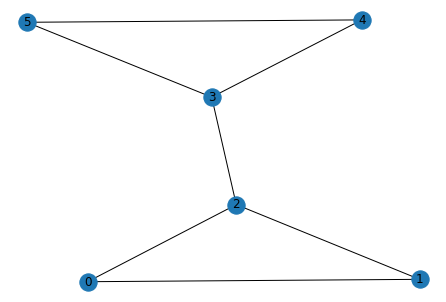

In [10]:
partion_G = nx.Graph()
partion_G.add_nodes_from([0,1,2,3,4,5])
partion_G.add_edge(0,1)
partion_G.add_edge(0,2)
partion_G.add_edge(1,2)
partion_G.add_edge(2,3)
partion_G.add_edge(3,4)
partion_G.add_edge(3,5)
partion_G.add_edge(4,5)

show_graph(partion_G,draw=True)

In [11]:
#Validating partitions
Validating=community.is_partition(partion_G, [(0,1,2),(3,4,5)])
Validating

True

In [71]:
#Measuring partitions
partition = [{0,1,2}, {3,4,5}]
Measuring=community.coverage(partion_G, partition)
Measuring

0.8571428571428571

# <b>Tree graph</b>

nodes: 6 edges: 5 <class 'networkx.classes.graph.Graph'>
node : (0, {})
edge : (0, 1, {})


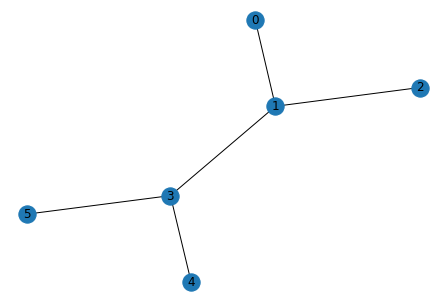

In [12]:
tree_G = nx.Graph()
tree_G.add_nodes_from([0,1,2,3,4,5])
tree_G.add_edge(0,1)
tree_G.add_edge(1,2)
tree_G.add_edge(1,3)
tree_G.add_edge(3,4)
tree_G.add_edge(3,5)
show_graph(tree_G,draw=True)

In [13]:
#Tree partitioning - Lukes Algorithm for exact optimal weighted tree partitioning
lukes=community.lukes_partitioning(tree_G,len(tree_G))
lukes

[{0, 1, 2, 3, 4, 5}]